In [1]:
import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
def create_mag_den_plot(inf_mag,inf_den,shrink,ax0,ax1,left=False):

    T = 0.08
    def nfer(iw): return T*np.pi*(2.*iw+1.)
    
    # x and y are bounds, so z should be the value *inside* those bounds.
    # Therefore, remove the last value from the z array.
    z1 = np.loadtxt(inf_mag)
    x1 = nfer(np.arange(-z1.shape[0]/2, z1.shape[0]/2))
    z2 = np.loadtxt(inf_den)
    x2 = nfer(np.arange(-z2.shape[0]/2, z2.shape[0]/2))

    # pick the desired colormap, sensible levels, and define a normalization
    # instance which takes data values and translates those into levels.
    cmap = plt.get_cmap('Spectral')
    
    im = ax0.pcolormesh(x1,x1,z1, cmap=cmap)
    fig.colorbar(im, ax=ax0, shrink=shrink)
    ax0.set_title(r'$\mathcal{M}^{\mathrm{\Lambda}_c}$, $\mathbf{Q}=(\pi,\pi-\delta)$, $\Omega=0$', fontsize=14)
    ax0.set_xlim(x1[0],x1[-1])
    ax0.grid(linestyle='dashed',linewidth=0.7)
    ax0.set_aspect(1)

    # contours are *point* based plots, so convert our bound into point
    # centers
    cf = ax1.pcolormesh(x2,x2,z2, cmap=cmap)
    fig.colorbar(cf, ax=ax1, shrink=shrink)
    if  left:
        ax0.set_ylabel(r'$\nu_2$', fontsize=14)
        ax1.set_ylabel(r'$\nu_2$', fontsize=14)
    ax1.set_xlabel(r'$\nu_1$', fontsize=14)
    ax1.grid(linestyle='dashed',linewidth=0.5)
    ax1.set_title(r'$\mathcal{C}^{\mathrm{\Lambda}_c}$, $\mathbf{Q}=(0,0)$, $\Omega=2\pi T$', fontsize=14)
    ax1.set_aspect(1)
    for ax in (ax0,ax1):
        ax.set_yticks(np.arange(-5,5.1,5.))
    ax1.set_xlim(x2[0],x2[-1])


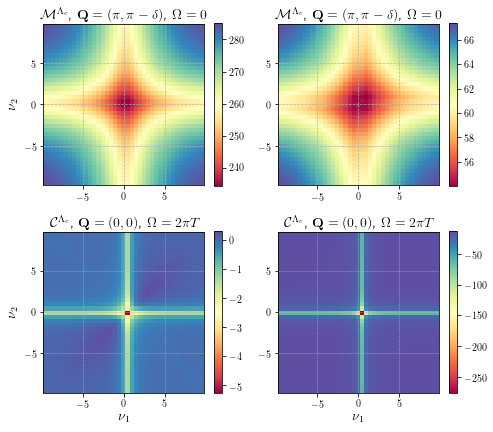

In [16]:
plt.clf()
fig, ((ax1, ax0),(ax3,ax2)) = plt.subplots(ncols=2,nrows=2,figsize=(7,7))
create_mag_den_plot('../data/Phi_mag_SE_fill_0.975.txt',
                    '../data/Phi_den_SE_fill_0.975.txt',
                    0.59, ax1,ax3,left=True)
create_mag_den_plot('../data/Phi_mag_NOSE_fill_0.600.txt',
                    '../data/Phi_den_NOSE_fill_0.600.txt',
                    0.59, ax0,ax2)

# adjust spacing between subplots so `ax1` title and `ax0` tick labels
# don't overlap
fig.subplots_adjust(hspace=-0.5)
fig.tight_layout()
plt.savefig('../images/Phi_color_all.png',dpi=300)


In [4]:
inf_den = "../data/Phi_den_SE_fill_0.975.txt"
z2 = np.loadtxt(inf_den)
print z2.shape
np.unravel_index(np.argmin(z2),z2.shape)


(40, 40)


(19, 20)

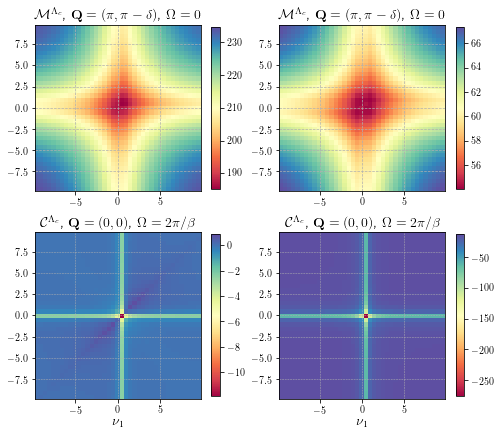

In [5]:
plt.clf()
fig, ((ax1, ax0),(ax3,ax2)) = plt.subplots(ncols=2,nrows=2,figsize=(7,7))
create_mag_den_plot('../data/Phi_mag_SE_fill_0.600.txt',
                    '../data/Phi_den_SE_fill_0.600.txt',
                    0.59, ax1,ax3)
create_mag_den_plot('../data/Phi_mag_NOSE_fill_0.600.txt',
                    '../data/Phi_den_NOSE_fill_0.600.txt',
                    0.59, ax0,ax2)

# adjust spacing between subplots so `ax1` title and `ax0` tick labels
# don't overlap
fig.subplots_adjust(hspace=-0.5)
fig.tight_layout()
#plt.savefig('../images/juppy/Phi_color_all.png',dpi=300)
